In [4]:
import pygor.load 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = 'C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/contralateral_OT_singleplane/st66/'


Found 6 custom classes in C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


In [5]:
filename = '2024-8-14_x240814_2_4cOT.h5'
data_object = pygor.load.Core(data_path+filename)

C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:64: UserWarning: 'wDataCh0_detrended' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-14_x240814_2_4cOT.h5, setting to np.nan
  self.images = try_fetch(HDF5_file, "wDataCh0_detrended")
C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:75: UserWarning: 'Positions' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-14_x240814_2_4cOT.h5, setting to np.nan
  self.ipl_depths = try_fetch(HDF5_file, "Positions")
C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:77: UserWarning: 'Snippets0' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-14_x240814_2_4cOT.h5, setting to np.nan
  self.snippets = try_fetch(HDF5_file, "Snippets0")
C

<b>Find where rois are located</b>

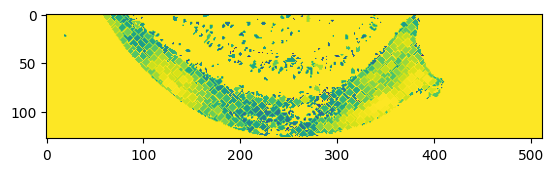

In [6]:
plt.imshow(data_object.rois)

<b>Get mean traces</b>

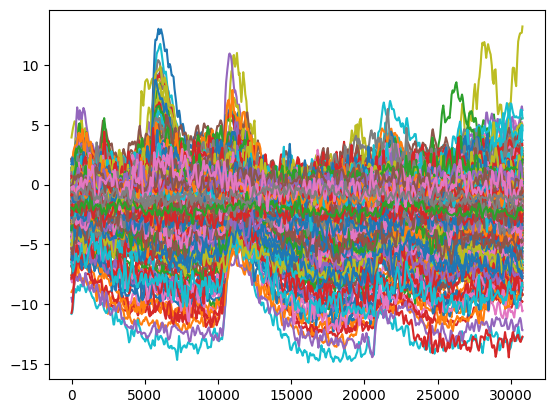

In [8]:
plt.plot(data_object.averages.transpose())

In [24]:
len(data_object.averages)

798

<b>Get stimulus triggers</b>

In [10]:
print(data_object.ms_dur)
print(data_object.frame_hz)
print(len(data_object.triggerstimes_frame))
print(data_object.linedur_s)
print(data_object.trigger_mode)


30802
3.9941205978393555
32
0.001955999992787838
9


In [11]:
def flexible_reshape(array, columns):
    # Calculate the number of elements to keep
    elements_to_keep = (len(array) // columns) * columns
    # Reshape the array
    reshaped_array = array[:elements_to_keep].reshape(-1, columns)
    return reshaped_array

triggertimes_ms = (data_object.triggerstimes_frame-data_object.triggerstimes_frame[0])/data_object.frame_hz/data_object.linedur_s

mean_triggertimes_ms = flexible_reshape(triggertimes_ms, data_object.trigger_mode)
mean_triggertimes_ms = np.mean(mean_triggertimes_ms, axis=0)-np.mean(mean_triggertimes_ms, axis=0)[0]

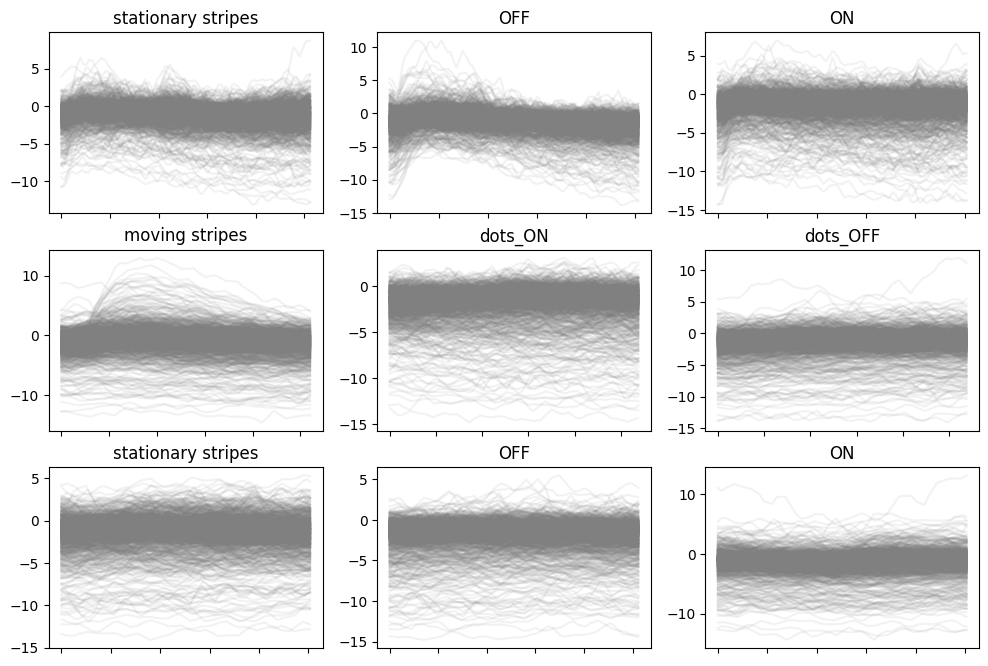

In [12]:
traces = data_object.averages
mean_triggertimes_extended = np.round(np.append(mean_triggertimes_ms, len(traces.transpose()))).astype(int)
stimtypes = ['stationary stripes','moving stripes','stationary stripes','OFF','dots_ON','OFF','ON','dots_OFF','ON',]
stim_responses = []

f, ax = plt.subplots(3, 3, figsize=(12, 8))

for idx, i in enumerate(mean_triggertimes_extended[:-1]):
    stim_responses.append(traces[:,i:mean_triggertimes_extended[idx+1]].transpose())  


for idx, i in enumerate(stim_responses):
    ax[idx%3, idx//3].plot(i, color='gray', alpha=0.1)  
    ax[idx%3, idx//3].set_xticklabels([])
    ax[idx%3, idx//3].set_title(stimtypes[idx])
    #ax[idx%3, idx//3].set_ylim(-5, 5)

In [13]:
from sklearn import cluster

dots_OFF = stim_responses[4]-stim_responses[4][1,:]
dots_off = dots_OFF.transpose()

kmeans_data = cluster.KMeans(n_clusters=3, init='k-means++', random_state=0)

kmeans_data.fit(dots_off)

labels = kmeans_data.labels_


[1 1 1 1 1 1 0 2 1 2 2 1 1 1 1 0 1 1 1 1 0 1 0 1 1 2 1 1 2 1 1 2 1 0 1 1 1
 1 1 1 2 1 1 1 1 0 1 2 2 0 2 1 0 1 1 1 0 1 0 2 0 0 1 0 0 1 1 0 2 1 1 1 2 2
 1 1 1 2 2 1 1 2 1 2 2 1 0 0 2 0 1 1 0 1 0 2 1 0 1 2 0 1 1 1 0 1 1 1 1 2 1
 1 0 0 2 0 2 0 2 1 1 1 1 0 1 1 0 1 0 2 1 1 2 0 0 1 1 0 1 2 2 1 1 0 1 2 2 1
 0 1 1 1 2 1 2 0 1 1 0 0 0 0 1 0 0 2 1 0 1 0 1 0 0 2 0 1 0 0 0 1 2 0 0 0 2
 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 2 0 1 1 1 0 0 1 1 2 2 1 1 1 0 2 0 0 0 0 0
 1 0 1 1 0 2 2 1 2 1 0 0 1 1 1 1 0 2 0 0 1 2 0 0 0 2 2 0 0 1 0 0 0 2 0 0 1
 0 1 1 1 1 2 0 0 1 1 1 2 0 0 1 0 0 1 0 0 0 2 1 0 1 1 2 0 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 2 0 1 1 0 1 2 1 2 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 2 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 2 0 0 0 2 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 1 1 0 0 1 0 0 1 2 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 2 0 0 0 1 1 1 2 0 0 2 0
 1 1 1 0 0 0 2 2 1 0 0 1 0 2 2 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 2 2
 2 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 2 1 0 1 2 0 1 0 1 0 1 0 0 1
 1 0 0 0 1 0 1 0 1 1 0 1 

c:\miniconda3\envs\PYGOR-TIMESERIES\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\miniconda3\envs\PYGOR-TIMESERIES\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


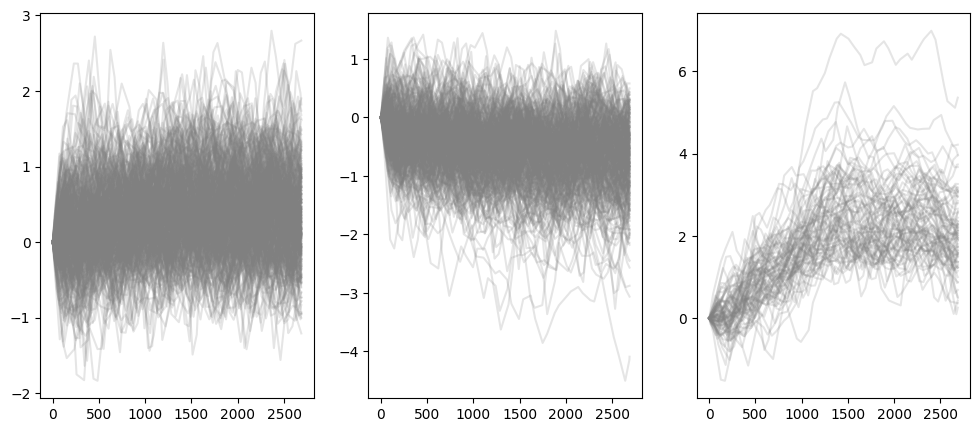

In [14]:
f, ax = plt.subplots(1, 3, figsize=(12, 5))
for idx, i in enumerate(np.unique(labels)):
    ax[idx].plot(dots_off[labels==i,:].transpose(), color='gray', alpha=0.2)

Try other clustering methods: self-organizing maps (SOM)

In [89]:

# Algorithms
from minisom import MiniSom
import pickle

def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [95]:
som_x = som_y = 5 #math.ceil(math.sqrt(math.sqrt(len(traces))))

som = MiniSom(som_x, som_y,len(traces[0]), sigma=1, learning_rate = 0.3, neighborhood_function='gaussian', random_seed=10)
som.random_weights_init(traces)
som.train(traces, 50000)

KeyboardInterrupt: 

In [87]:
#save the SOM
with open('C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/clustering analysis/mexicamhat_sigma1.5_randomseed10_lr0.1', 'wb') as outfile:
    pickle.dump(som, outfile)


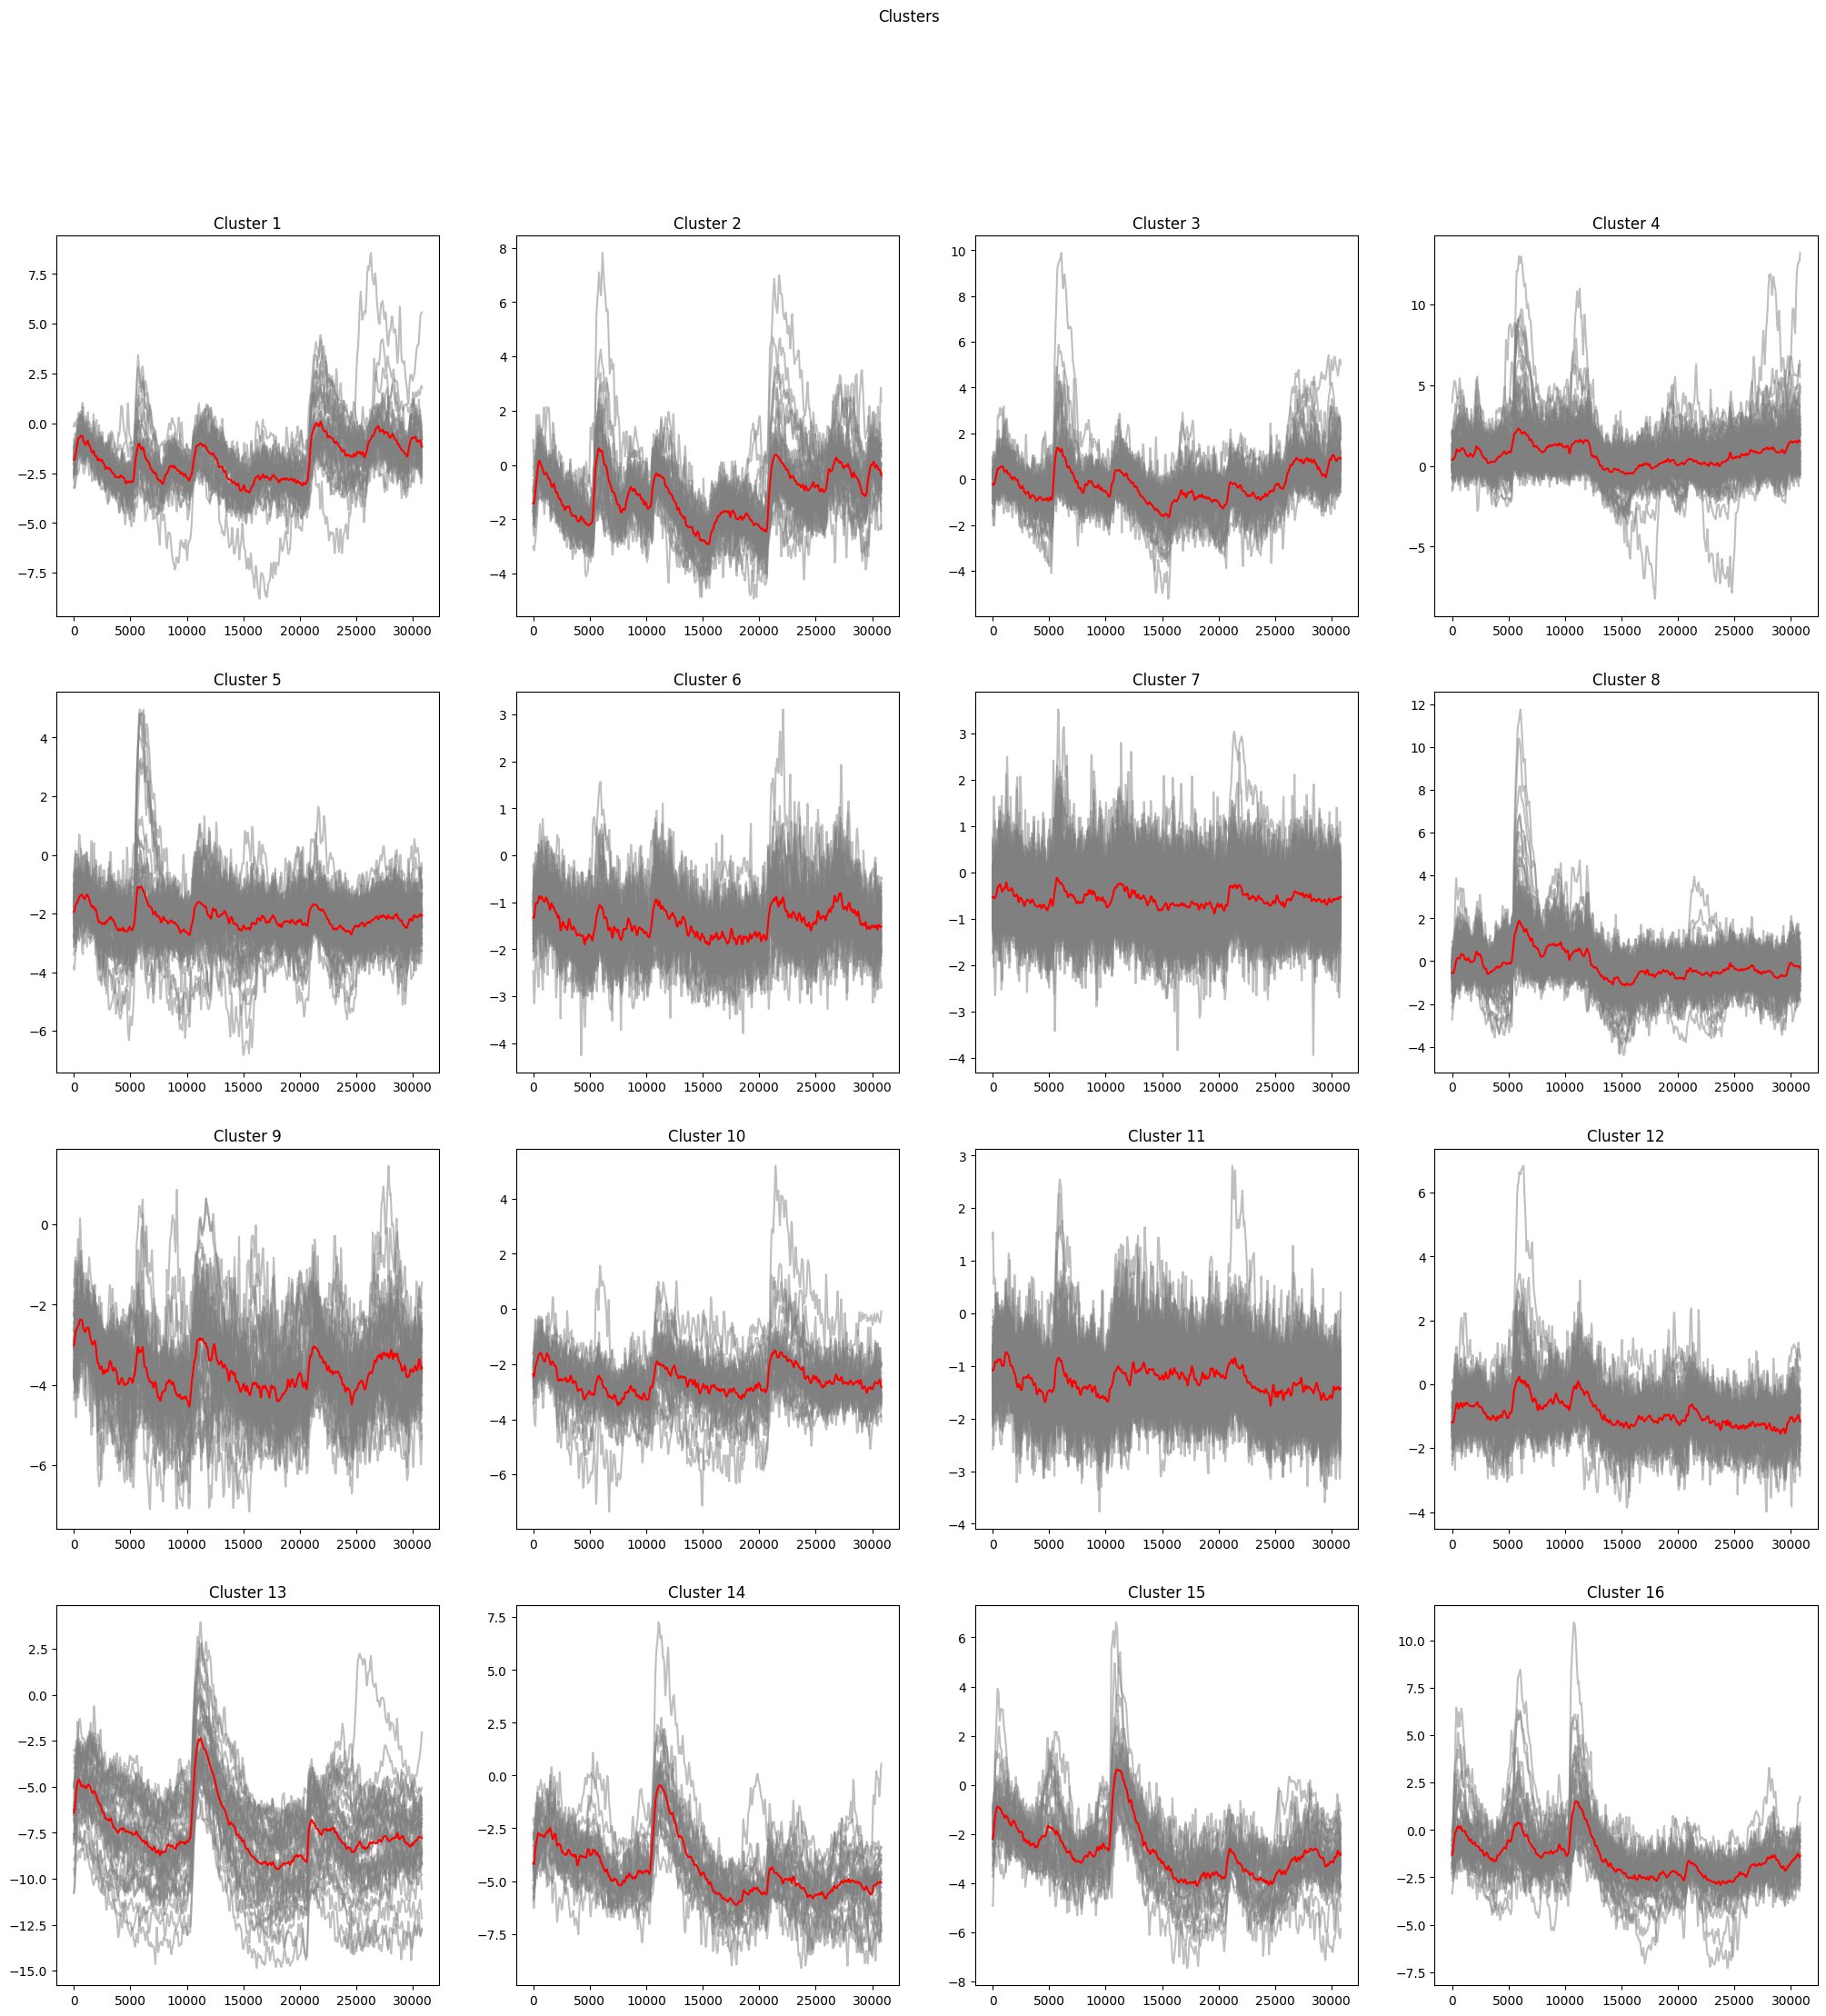

In [94]:
win_map = som.win_map(traces)

plot_som_series_averaged_center(som_x, som_y, win_map)

In [67]:


def get_som_series_averaged_center(som_x, som_y, win_map):
    clustered_traces = []
    cluster_averages = []
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                clustered_traces.append(np.vstack(win_map[cluster]))
                cluster_averages.append(np.average(np.vstack(win_map[cluster]),axis=0))
    return clustered_traces, cluster_averages


import numpy as np
from scipy.signal import correlate

def cross_correlation_similarity(time_series_list):
    n = len(time_series_list)
    similarity_matrix = np.zeros((n, n))

    # Compute cross-correlation for each pair of time series
    for i in range(n):
        for j in range(i, n):
            corr = correlate(time_series_list[i], time_series_list[j], mode='full')
            max_corr = np.max(np.abs(corr))
            similarity_matrix[i, j] = max_corr
            similarity_matrix[j, i] = max_corr

    # Sort indices based on similarity
    sorted_indices = np.argsort(-similarity_matrix.sum(axis=1))
    
    # Return sorted time series based on similarity
    sorted_time_series = [time_series_list[i] for i in sorted_indices]
    return sorted_time_series, similarity_matrix

clustered_traces, cluster_averages = get_som_series_averaged_center(som_x, som_y, win_map)



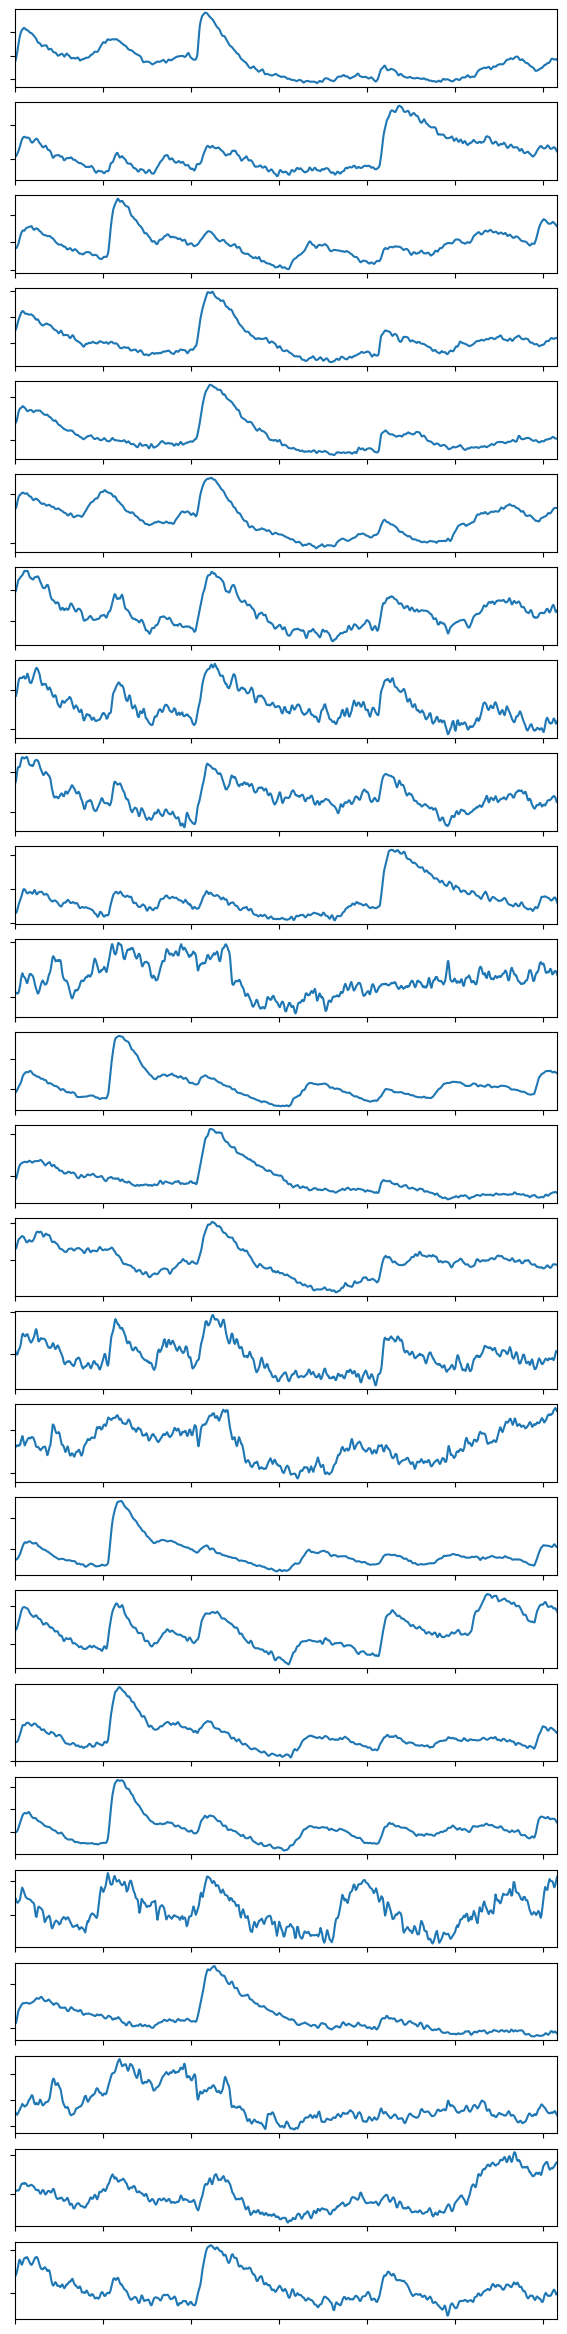

In [84]:
f, ax = plt.subplots(len(cluster_averages), 1, figsize=(7, 30))
for i in range(len(cluster_averages)):
    ax[i].plot(clustered_traces[i], color='r')
    ax[i].plot(cluster_averages[i], color='r')
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xlim(0, len(cluster_averages[i]))
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

ax.tight_layout()

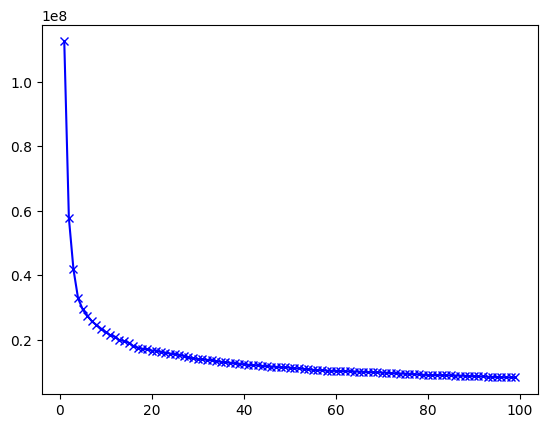

In [50]:
cost = []

for i in range(1, 100):
    kmeans_data = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_data.fit(traces)
    cost.append(kmeans_data.inertia_)

plt.plot(range(1, 100), cost, 'bx-')
labels = kmeans_data.labels_

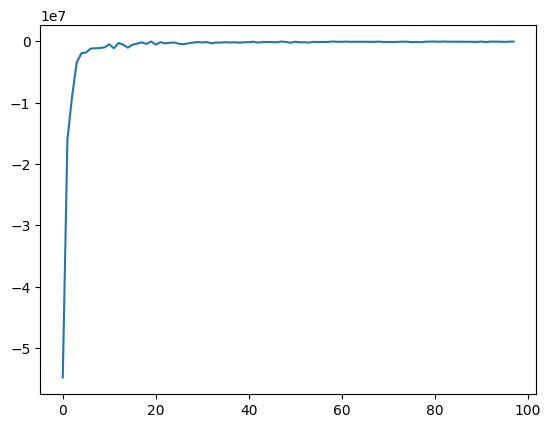

In [86]:
plt.plot(np.diff(cost))